In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 71.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 20.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 95.3 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 98.0 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
# check installed version
import pycaret
pycaret.__version__

'3.3.2'

# Data reading

In [3]:
import pandas as pd

frames = []

for i in range(1, 2):  # 1'den 2'ye kadar olan dosyaları oku (sadece capstone.1.jsonl.gz okunacak)
    url = f"https://storage.googleapis.com/sadedegel/dataset/tt-capstone/capstone.{i}.jsonl.gz"
    fd = pd.read_json(url, lines=True, compression='gzip')  # JSONL formatında okuma
    frames.append(fd)

# Tüm DataFrame'leri birleştir
df = pd.concat(frames, ignore_index=True)

# İlk 5 satırı göster
df.head(5)


,id,age,tenure,service_type,avg_call_duration,data_usage,roaming_usage,monthly_charge,overdue_payments,auto_payment,avg_top_up_count,call_drops,customer_support_calls,satisfaction_score,apps,churn
0,51893f29-e6c2-45d3-807c-e1280d3d7b90,18,53.0,Prepaid,106.74,139.72,47.31,59.45,0,NaN,25,18.0,13,1.34,[],False
1,a568caf1-d851-4847-a9f5-20ef9017fa92,26,15.0,Prepaid,31.55,12.14,21.52,1221.65,0,NaN,51,8.0,3,2.57,[],False
2,c611bf0e-a013-44dc-9939-bd33dab16d14,32,152.0,Postpaid,30.64,10.17,31.11,1170.45,0,1.0,0,13.0,10,8.02,[],False
3,9284b7b8-a4ef-49a7-9fa4-333954491f57,33,35.0,Prepaid,NaN,NaN,36.03,2418.91,0,NaN,19,7.0,11,5.96,[RitimGo],False
4,e205b674-a6e6-43c5-aed7-9497c37c5c82,18,243.0,Prepaid,85.62,164.79,46.40,1518.19,0,NaN,99,15.0,6,8.29,[],False


In [4]:
df.head(5)

,id,age,tenure,service_type,avg_call_duration,data_usage,roaming_usage,monthly_charge,overdue_payments,auto_payment,avg_top_up_count,call_drops,customer_support_calls,satisfaction_score,apps,churn
0,51893f29-e6c2-45d3-807c-e1280d3d7b90,18,53.0,Prepaid,106.74,139.72,47.31,59.45,0,NaN,25,18.0,13,1.34,[],False
1,a568caf1-d851-4847-a9f5-20ef9017fa92,26,15.0,Prepaid,31.55,12.14,21.52,1221.65,0,NaN,51,8.0,3,2.57,[],False
2,c611bf0e-a013-44dc-9939-bd33dab16d14,32,152.0,Postpaid,30.64,10.17,31.11,1170.45,0,1.0,0,13.0,10,8.02,[],False
3,9284b7b8-a4ef-49a7-9fa4-333954491f57,33,35.0,Prepaid,NaN,NaN,36.03,2418.91,0,NaN,19,7.0,11,5.96,[RitimGo],False
4,e205b674-a6e6-43c5-aed7-9497c37c5c82,18,243.0,Prepaid,85.62,164.79,46.40,1518.19,0,NaN,99,15.0,6,8.29,[],False


In [5]:
df.shape

(1000000, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 16 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   id                      1000000 non-null  object 
 1   age                     1000000 non-null  int64  
 2   tenure                  997490 non-null   float64
 3   service_type            1000000 non-null  object 
 4   avg_call_duration       633869 non-null   float64
 5   data_usage              950120 non-null   float64
 6   roaming_usage           667006 non-null   float64
 7   monthly_charge          974801 non-null   float64
 8   overdue_payments        1000000 non-null  int64  
 9   auto_payment            665862 non-null   float64
 10  avg_top_up_count        1000000 non-null  int64  
 11  call_drops              667006 non-null   float64
 12  customer_support_calls  1000000 non-null  int64  
 13  satisfaction_score      1000000 non-null  float64
 14  app

In [7]:
df.isnull().sum()

id                             0
age                            0
tenure                      2510
service_type                   0
avg_call_duration         366131
data_usage                 49880
roaming_usage             332994
monthly_charge             25199
overdue_payments               0
auto_payment              334138
avg_top_up_count               0
call_drops                332994
customer_support_calls         0
satisfaction_score             0
apps                           0
churn                          0
dtype: int64

## İD

In [8]:
mf=df
df.drop("id",inplace=True,axis=1)

## age

In [9]:
df["age"].unique()

array([18, 26, 32, 33, 37, 20, 36, 47, 19, 42, 29, 41, 31, 25, 23, 38, 50,
       64, 57, 40, 44, 27, 28, 55, 22, 46, 35, 21, 49, 34, 30, 24, 54, 52,
       43, 45, 56, 53, 39, 62, 51, 48, 61, 60, 58, 73, 59, 63, 69, 68, 75,
       71, 67, 66, 65, 77, 70, 74, 76, 80, 78, 72, 79])

In [10]:
df["age"].mean()

30.391954

In [11]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


df[["age"]].value_counts().reset_index().T


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62
age,18,22,21,23,20,19,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,80,76,77,78,79
count,205197,33287,33225,32798,32745,31616,31609,30616,29449,28278,26966,26290,25231,24997,24415,23472,23468,23192,22355,22001,21603,20787,20191,19298,18573,17534,16106,15118,14107,12929,11660,10821,9472,8751,7442,6734,6038,5112,4387,3785,3326,2680,2340,1851,1579,1314,1038,926,718,588,449,354,312,217,187,128,98,64,59,39,36,26,16


## tenure

In [12]:
df[["tenure"]].isnull().sum()

tenure    2510
dtype: int64

In [13]:
df[["tenure"]].isnull().sum()

tenure    2510
dtype: int64

## service type

In [14]:
df[["service_type"]].value_counts()

service_type
Postpaid        333691
Prepaid         333315
Broadband       332994
Name: count, dtype: int64

In [15]:
df[["service_type"]].isnull().sum()

service_type    0
dtype: int64

## avg_call_duration

In [16]:
## boş olanlar int

In [17]:
df[["avg_call_duration"]].mean()

avg_call_duration    60.418678
dtype: float64

In [18]:
df[["avg_call_duration"]].isnull().sum()

avg_call_duration    366131
dtype: int64

In [19]:
df[["avg_call_duration"]].isnull().sum()

avg_call_duration    366131
dtype: int64

In [20]:
df[["avg_call_duration"]]=df[["avg_call_duration"]]/60 #dakika olasun diye

In [21]:
df[["avg_call_duration"]].median()

avg_call_duration    1.006
dtype: float64

## data_usage

In [22]:
df[["data_usage"]].mean()

data_usage    100.17852
dtype: float64

In [23]:
df[["data_usage"]].isnull().sum()

data_usage    49880
dtype: int64

In [24]:
df[["data_usage"]].isnull().sum()

data_usage    49880
dtype: int64

## roaming_usage

In [25]:
df[["roaming_usage"]].mean()

roaming_usage    29.995078
dtype: float64

In [26]:
df[["roaming_usage"]].isnull().sum()

roaming_usage    332994
dtype: int64

In [27]:
df[["roaming_usage"]].isnull().sum()

roaming_usage    332994
dtype: int64

## monthly_charge

In [28]:
df[["monthly_charge"]].mean()

monthly_charge    743.541912
dtype: float64

In [29]:
df[["monthly_charge"]].isnull().sum()

monthly_charge    25199
dtype: int64

## overdue_payments

In [30]:
df[["overdue_payments"]].mean()

overdue_payments    1.665858
dtype: float64

In [31]:
df[["overdue_payments"]].isnull().sum()

overdue_payments    0
dtype: int64

## auto_payment

## avg_top_up_count

## call_drops

## customer_support_calls

## satisfaction_score

## apps

## churn

In [32]:
df.head()

,age,tenure,service_type,avg_call_duration,data_usage,roaming_usage,monthly_charge,overdue_payments,auto_payment,avg_top_up_count,call_drops,customer_support_calls,satisfaction_score,apps,churn
0,18,53.0,Prepaid,1.779000,139.72,47.31,59.45,0,NaN,25,18.0,13,1.34,[],False
1,26,15.0,Prepaid,0.525833,12.14,21.52,1221.65,0,NaN,51,8.0,3,2.57,[],False
2,32,152.0,Postpaid,0.510667,10.17,31.11,1170.45,0,1.0,0,13.0,10,8.02,[],False
3,33,35.0,Prepaid,NaN,NaN,36.03,2418.91,0,NaN,19,7.0,11,5.96,[RitimGo],False
4,18,243.0,Prepaid,1.427000,164.79,46.40,1518.19,0,NaN,99,15.0,6,8.29,[],False


In [33]:
# 'churn' sütununu int tipine dönüştür
df['churn'] = df['churn'].astype("int")

# 'service_type' sütununu kategori tipine dönüştür
df['service_type'] = df['service_type'].astype("category")

# 'apps' sütununu düşür (df üzerinde işlem yaparak)
df = df.drop(columns=['apps'])


In [34]:
df.head()

,age,tenure,service_type,avg_call_duration,data_usage,roaming_usage,monthly_charge,overdue_payments,auto_payment,avg_top_up_count,call_drops,customer_support_calls,satisfaction_score,churn
0,18,53.0,Prepaid,1.779000,139.72,47.31,59.45,0,NaN,25,18.0,13,1.34,0
1,26,15.0,Prepaid,0.525833,12.14,21.52,1221.65,0,NaN,51,8.0,3,2.57,0
2,32,152.0,Postpaid,0.510667,10.17,31.11,1170.45,0,1.0,0,13.0,10,8.02,0
3,33,35.0,Prepaid,NaN,NaN,36.03,2418.91,0,NaN,19,7.0,11,5.96,0
4,18,243.0,Prepaid,1.427000,164.79,46.40,1518.19,0,NaN,99,15.0,6,8.29,0


In [35]:
from pycaret.classification import*
from pycaret.classification import setup, create_model, save_model
import pandas as pd

In [36]:
setup(data=df,target='churn')

,Description,Value
0,Session id,4999
1,Target,churn
2,Target type,Binary
3,Original data shape,"(1000000, 14)"
4,Transformed data shape,"(1000000, 16)"
5,Transformed train set shape,"(700000, 16)"
6,Transformed test set shape,"(300000, 16)"
7,Numeric features,12
8,Categorical features,1
9,Rows with missing values,70.7%


In [37]:
best_model= compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9867,0.7329,0.0000,0.0000,0.0000,0.0000,0.0000,17.6030
nb,Naive Bayes,0.9867,0.6707,0.0001,0.1000,0.0002,0.0002,0.0029,0.7110
ridge,Ridge Classifier,0.9867,0.7362,0.0000,0.0000,0.0000,0.0000,0.0000,0.7070
rf,Random Forest Classifier,0.9867,0.7192,0.0000,0.0000,0.0000,0.0000,0.0000,82.3370
ada,Ada Boost Classifier,0.9867,0.7701,0.0000,0.0000,0.0000,0.0000,0.0000,17.4790
gbc,Gradient Boosting Classifier,0.9867,0.7844,0.0000,0.0000,0.0000,-0.0000,-0.0004,81.1670
lda,Linear Discriminant Analysis,0.9867,0.7362,0.0000,0.0000,0.0000,0.0000,0.0000,1.0560
et,Extra Trees Classifier,0.9867,0.7101,0.0000,0.0000,0.0000,0.0000,0.0000,34.2810
xgboost,Extreme Gradient Boosting,0.9867,0.7712,0.0000,0.0000,0.0000,-0.0000,-0.0001,3.5950
catboost,CatBoost Classifier,0.9867,0.7687,0.0001,0.1000,0.0002,0.0002,0.0031,79.2440


In [39]:
save_model(best_model, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'tenure',
                                              'avg_call_duration', 'data_usage',
                                              'roaming_usage', 'monthly_charge',
                                              'overdue_payments', 'auto_payment',
                                              'avg_top_up_count', 'call_drops',
                                              'customer_support_calls',
                                              'satisfaction_score'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               cop...
                                                               handle_missing='return_nan',
                                                               handle_unknown='value',
         

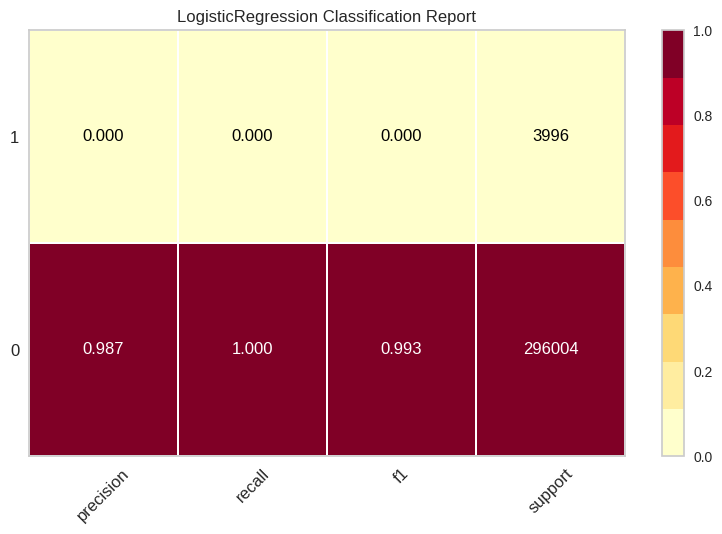

In [40]:
# plot class report
plot_model(best_model, plot = 'class_report')


In [42]:
# to save the plot
plot_model(best_model, plot = 'class_report', save=True)

'Class Report.png'

In [43]:
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Multiclass,Custom
ID,,,,,,,,,
acc,Accuracy,Accuracy,<function accuracy_score at 0x7d2c2c730e50>,accuracy,pred,{},True,True,False
auc,AUC,AUC,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(roc_auc_score, response_method=('d...",pred_proba,"{'average': 'weighted', 'multi_class': 'ovr'}",True,True,False
recall,Recall,Recall,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(recall_score, response_method='pre...",pred,{'average': 'weighted'},True,True,False
precision,Precision,Prec.,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(precision_score, response_method='...",pred,{'average': 'weighted'},True,True,False
f1,F1,F1,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(f1_score, response_method='predict...",pred,{'average': 'weighted'},True,True,False
kappa,Kappa,Kappa,<function cohen_kappa_score at 0x7d2c2c7311b0>,"make_scorer(cohen_kappa_score, response_method...",pred,{},True,True,False
mcc,MCC,MCC,<function matthews_corrcoef at 0x7d2c2c7313f0>,"make_scorer(matthews_corrcoef, response_method...",pred,{},True,True,False


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9867,0.7827,0.0000,0.0000,0.0000,-0.0000,-0.0004
1,0.9867,0.7816,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9867,0.7906,0.0000,0.0000,0.0000,-0.0001,-0.0006
3,0.9867,0.7844,0.0000,0.0000,0.0000,-0.0001,-0.0006
4,0.9867,0.7821,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9866,0.7870,0.0000,0.0000,0.0000,-0.0001,-0.0008
6,0.9867,0.7831,0.0000,0.0000,0.0000,-0.0000,-0.0004
7,0.9867,0.7820,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9866,0.7801,0.0000,0.0000,0.0000,-0.0001,-0.0006


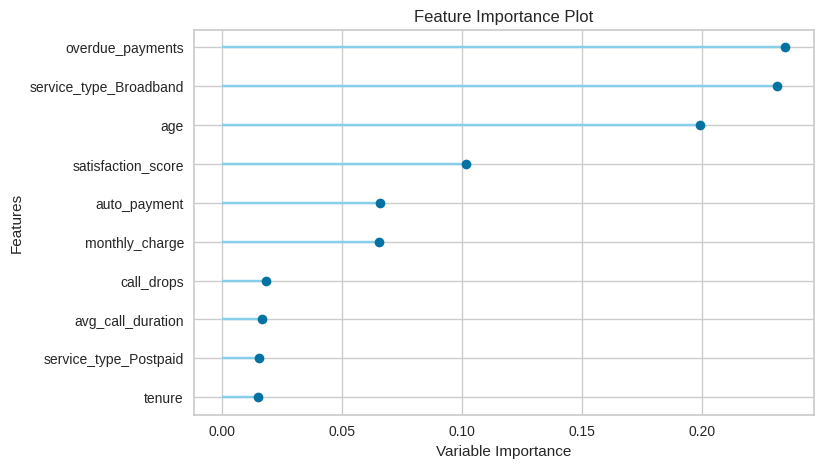

In [50]:
gbc_model = create_model('gbc')  # Gradient Boosting modelini oluştur
plot_model(gbc_model, plot='feature')  # Özellik önemini görselleştir
